In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constants
import scipy.special as special
from matplotlib import rc as rc
%matplotlib inline
import math as math

In [2]:
plt.style.use("bmh")
plt.rcParams.update({
    'font.size': 12,
    'figure.figsize': (8,6),
    'xtick.minor.visible': True,
    'ytick.minor.visible': True})
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':12})
# rc('text', usetex=True)

In [3]:
%autoreload 2
from mls_scf_tools.mls_pint import ureg
import dualpy as dp
def myseed(x, name):
    return dp.seed(x, name)

# Do a fairly kinematic calculation

In [4]:
tv = np.linspace(0,60,61)*ureg.s
uv = 10.0*ureg.m/ureg.s
av = 5.0*ureg.m/ureg.s**2

t = myseed(tv, "t")
# t = tv
u = myseed(uv, "u")
# u = uv
a = myseed(av, "a")
# a = av

In [5]:
print(t.jacobians)

{'t': Jacobian of type <class 'dualpy.diagonal_jacobians.SeedJacobian'>
Dependent shape is (61,) <61>
Independent shape is (61,) <61>
Combined they are (61, 61) <3721>
Dummies are (1,) and (1,)
Units are d<second>/d<second> = <dimensionless>
data is (61,)}


In [6]:
# t = dp.seed(tv, "t")
# t = t.to(ureg.min)
# u = u.to(ureg.imperial.mile/ureg.hour)
# j = t.jacobians["t"]
# jv = j.diagonal()[0]
# print (f"Seed value has become {jv}")
# print (f"ureg are {j.dependent_unit} by {j.independent_unit}")

In [7]:
s = u*t + 0.5*a*t**2
v = u + a*t

dual_helpers, mul
dual_helpers, rmul
dual_helpers, mul
dual_helpers, add
dual_helpers, mul
dual_helpers, add


In [8]:
s = s.to_base_units()
i = -1
J = s.jacobians["t"]
vAna = J.extract_diagonal().to_base_units()
print (J.dependent_unit, ' by ', J.independent_unit)
print (f"At t={t[i]}, s={s[i]}, v={v[i].to_base_units()}, vAna={vAna[i]}")

meter  by  second
At t=60.0 second, s=9600.0 meter, v=310.0 meter / second, vAna=310.0 meter / second


In [9]:
print (t)
print (t.jacobians["t"])

[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 26.0 27.0 28.0 29.0 30.0 31.0 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 42.0 43.0 44.0 45.0 46.0 47.0 48.0 49.0 50.0 51.0 52.0 53.0 54.0 55.0 56.0 57.0 58.0 59.0 60.0] second
Jacobian of type <class 'dualpy.diagonal_jacobians.SeedJacobian'>
Dependent shape is (61,) <61>
Independent shape is (61,) <61>
Combined they are (61, 61) <3721>
Dummies are (1,) and (1,)
Units are d<second>/d<second> = <dimensionless>
data is (61,)


In [10]:
print (s)
print (s.jacobians["t"])

[0.0 12.5 30.0 52.5 80.0 112.5 150.0 192.5 240.0 292.5 350.0 412.5 480.0 552.5 630.0 712.5 800.0 892.5 990.0 1092.5 1200.0 1312.5 1430.0 1552.5 1680.0 1812.5 1950.0 2092.5 2240.0 2392.5 2550.0 2712.5 2880.0 3052.5 3230.0 3412.5 3600.0 3792.5 3990.0 4192.5 4400.0 4612.5 4830.0 5052.5 5280.0 5512.5 5750.0 5992.5 6240.0 6492.5 6750.0 7012.5 7280.0 7552.5 7830.0 8112.5 8400.0 8692.5 8990.0 9292.5 9600.0] meter
Jacobian of type <class 'dualpy.diagonal_jacobians.DiagonalJacobian'>
Dependent shape is (61,) <61>
Independent shape is (61,) <61>
Combined they are (61, 61) <3721>
Dummies are (1,) and (1,)
Units are d<meter>/d<second> = <meter / second>
data is (61,)


/users/livesey/python/dualpy/dualpy/duals.py:217: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(self.variable, dtype)


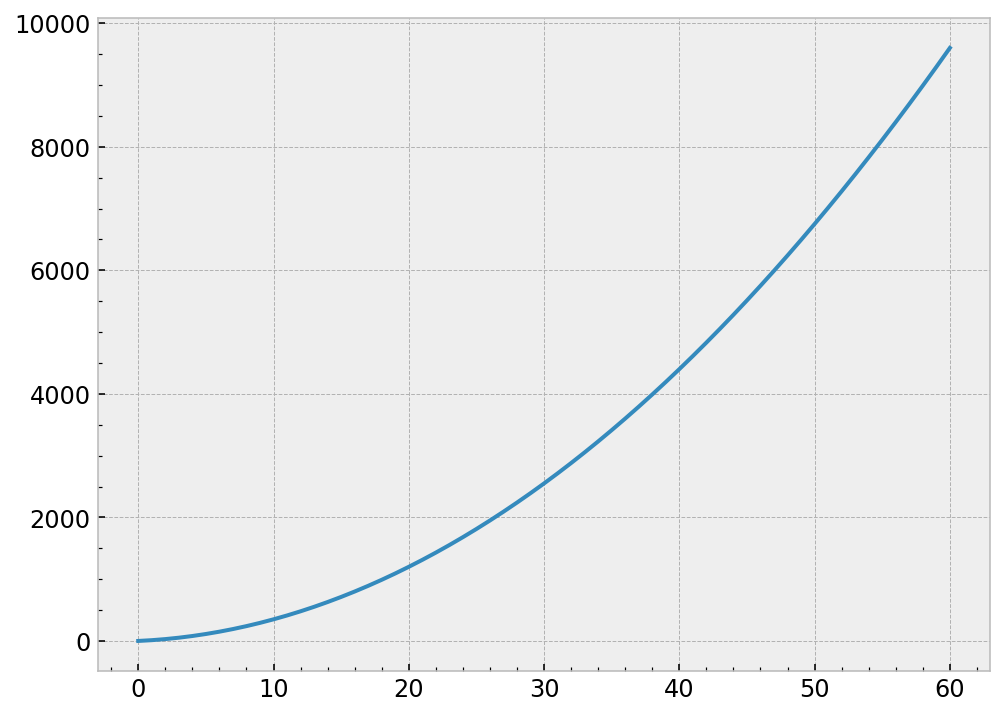

In [11]:
plt.plot(t,s)
plt.show()

## Now some oscillation / trigonometry stuff

In [12]:
theta = 30.0*ureg.deg
# theta = theta.to(ureg.rad)
theta = myseed(theta,"theta")
s = np.sin(theta)
j = s.jacobians["theta"].extract_diagonal().to_base_units()
print (f"sin is {s}, ds/dtheta={j}")

scale is 1.0 dimensionless
sin is 0.4999999999999999 dimensionless, ds/dtheta=0.8660254037844386 dimensionless


In [13]:
tv = np.linspace(0,50,501)*ureg.s
omegav = 0.1*constants.pi*2 * (ureg.rad/ureg.s)
av = 10.0*ureg.m

In [14]:
t = myseed(tv,"t")
print(t.jacobians['t'])
# t = t.to(ureg.minute)
# t = tv
omega = myseed(omegav, "omega")
# omega = omegav
a = myseed(av,"a")
# a = a.to(ureg.cm)
# a = av

Jacobian of type <class 'dualpy.diagonal_jacobians.SeedJacobian'>
Dependent shape is (501,) <501>
Independent shape is (501,) <501>
Combined they are (501, 501) <251001>
Dummies are (1,) and (1,)
Units are d<second>/d<second> = <dimensionless>
data is (501,)


In [15]:
phase = omega*t
print (f"Phase has ureg of {phase.units}")
x = a*np.sin(phase)

dual_helpers, mul
Phase has ureg of radian
scale is 1.0 dimensionless
scale is 1.0 dimensionless
dual_helpers, mul


In [16]:
xa = x.jacobians["a"]
sa = a.jacobians["a"]
print (sa.independent_shape)
print (xa.independent_shape)

()
()


In [17]:
v = x.jacobians["t"].extract_diagonal()
print (f"v[0] = {v[0]}")
print (v.units)
v = v.to(ureg.m/ureg.s)
x = x.to(ureg.m)

v[0] = 6.283185307179586 meter * radian / second
meter * radian / second


(501, 501)


/users/livesey/python/dualpy/dualpy/duals.py:217: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(self.variable, dtype)
/users/livesey/python/dualpy/dualpy/duals.py:217: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(self.variable, dtype)
/users/livesey/python/dualpy/dualpy/duals.py:217: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(self.variable, dtype)
/users/livesey/python/dualpy/dualpy/duals.py:217: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(self.variable, dtype)


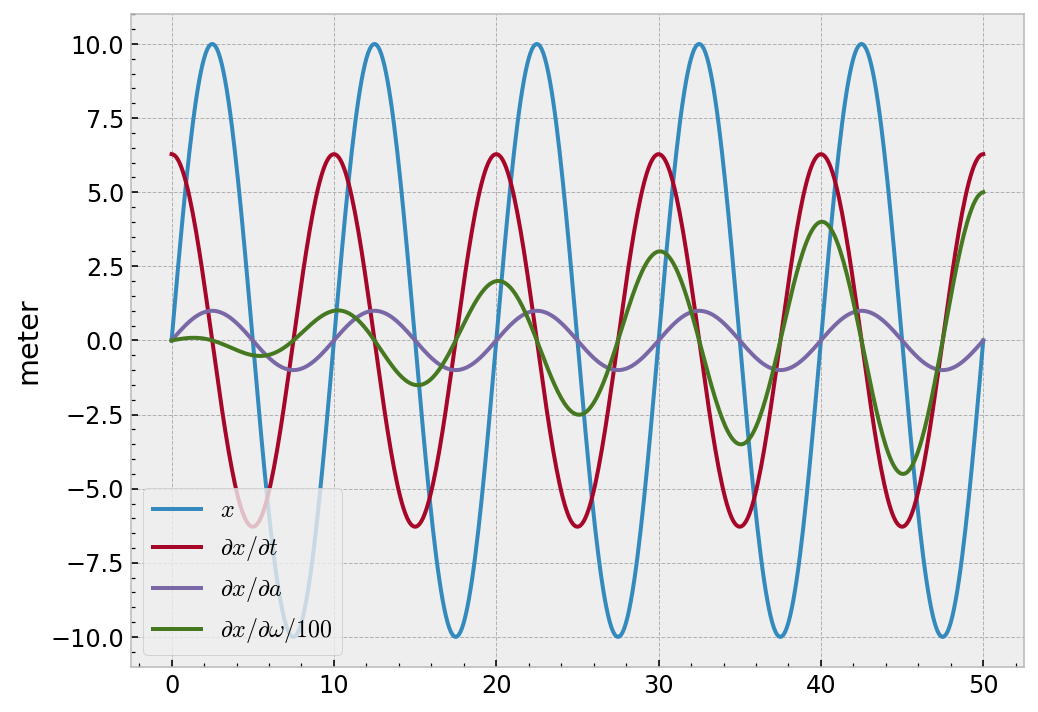

<class 'pint.unit.build_unit_class.<locals>.Unit'>


In [18]:
plt.plot(t,x.magnitude, label='$x$')
plt.plot(t,v.magnitude, label='$\partial x/\partial t$')
print (x.jacobians["t"].shape)
dxda = x.jacobians["a"].todensearray()
plt.plot(t,dxda, label='$\partial x/\partial a$')
dxdomega = x.jacobians["omega"].todensearray()
plt.plot(t,dxdomega.magnitude/100, label='$\partial x/\partial\omega/100$')
plt.legend()
plt.show()
print (type(v.units))

In [19]:
for name, j in x.jacobians.items():
    print (f"{name} is in {j.dependent_unit} by {j.independent_unit}")
        #values = np.array(j.data) << j.unit
        #print (f"{name}={values}")

a is in meter ** 2 by meter
omega is in meter ** 2 * radian by radian / second
t is in meter ** 2 * radian by second


In [20]:
xV = 0.5 * ureg.dimensionless
x = myseed(xV,"x")
print (np.arcsin(x).to(ureg.deg))

30.000000000000004 degree


In [21]:
def func(x): return np.sqrt(x)
xV = np.linspace(1,10,201) * ureg.dimensionless
x = myseed(xV, "x")
y = func(x)
jA = y.jacobians["x"].extract_diagonal()

In [22]:
dx = 1e-9*xV[-1]
jN = (func(xV+dx)-func(xV))/dx

/users/livesey/python/dualpy/dualpy/duals.py:217: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(self.variable, dtype)
/users/livesey/python/dualpy/dualpy/duals.py:217: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(self.variable, dtype)
/users/livesey/python/dualpy/dualpy/duals.py:217: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(self.variable, dtype)
/users/livesey/python/dualpy/dualpy/duals.py:217: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(self.variable, dtype)


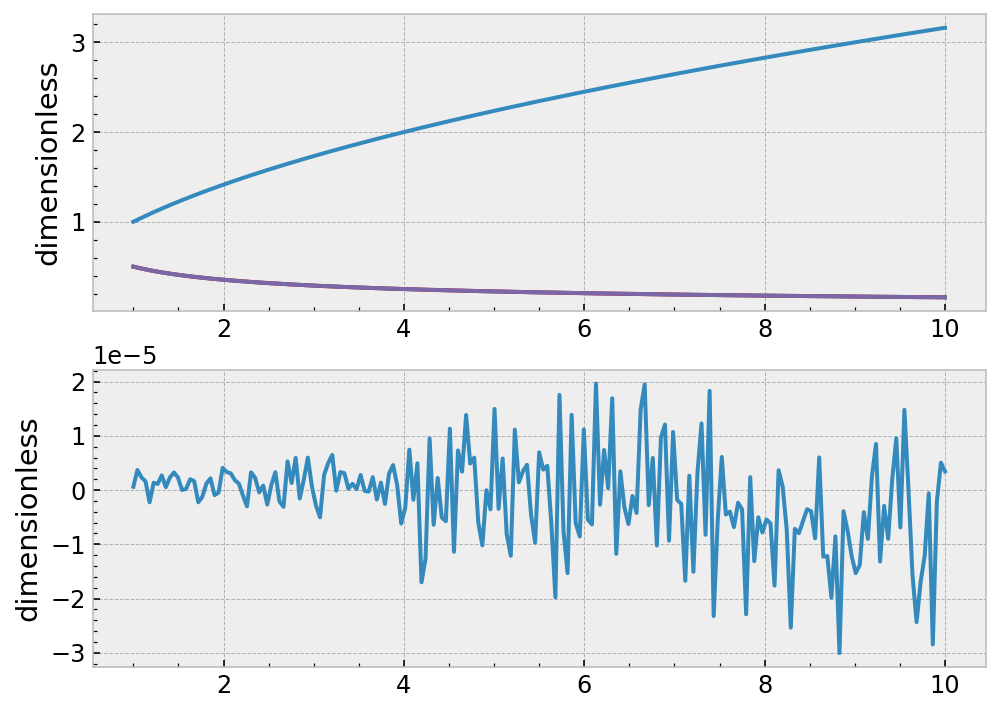

In [23]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(x,y)
ax1.plot(x,jA)
ax1.plot(x,jN)
ax2.plot(x,100.0*(jA-jN)/jA)
plt.show()